In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
path=r'C:\Users\amrut\Downloads\CAR DETAILS FROM CAR DEKHO.csv'
d=pd.read_csv(path)


In [15]:
d.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [19]:
d.shape

(4340, 8)

In [20]:
d.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [21]:
d.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [22]:
d.eq(0).any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [23]:
d.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [24]:
d.mean(numeric_only=True)

year               2013.090783
selling_price    504127.311751
km_driven         66215.777419
dtype: float64

In [25]:
d.mode(numeric_only=True)

,year,selling_price,km_driven
0,2017,300000,70000


In [26]:
d.median(numeric_only=True)

year               2014.0
selling_price    350000.0
km_driven         60000.0
dtype: float64

In [27]:
d1=d.select_dtypes(include='number')
d1.mean()

year               2013.090783
selling_price    504127.311751
km_driven         66215.777419
dtype: float64

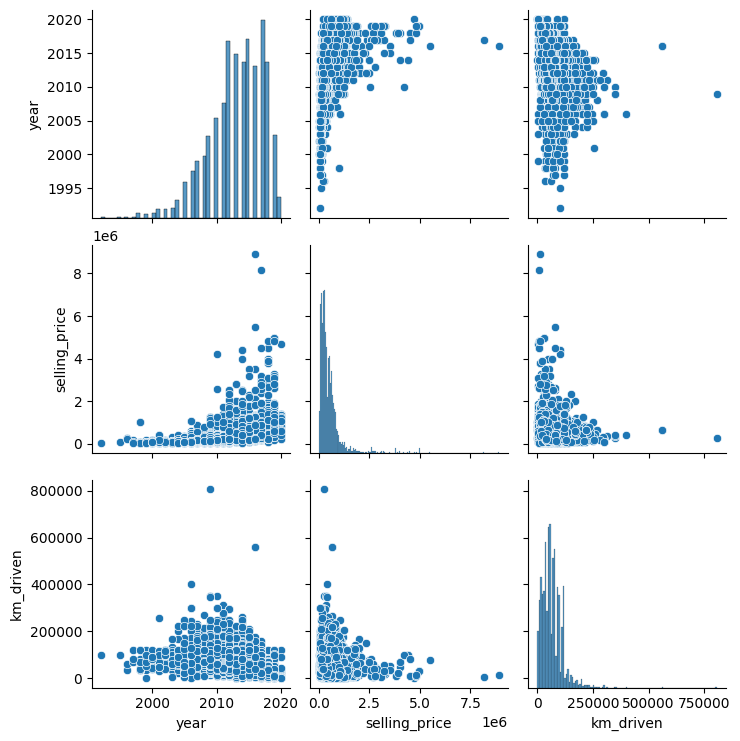

In [28]:
sns.pairplot(d)
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

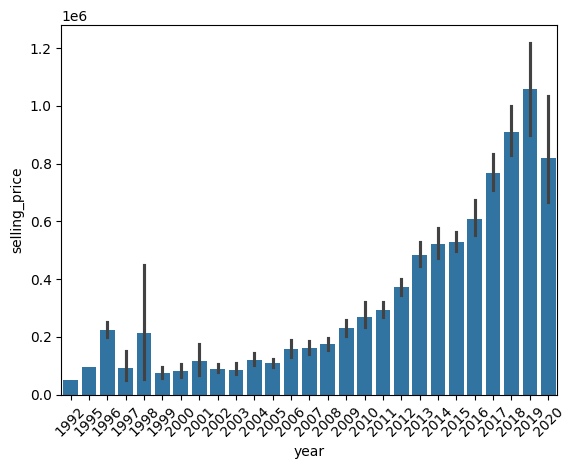

In [29]:
d1=sns.barplot(data=d,x=d['year'],y=d['selling_price'])
plt.xticks(rotation=45)
d1

In [30]:
X = d[['year']]  
y = d['selling_price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(X_test)


In [33]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
r_squared = r2_score(y_test, y_pred)
print(r_squared)

249478290461.57867
263730.3839427709
0.18159813372994238


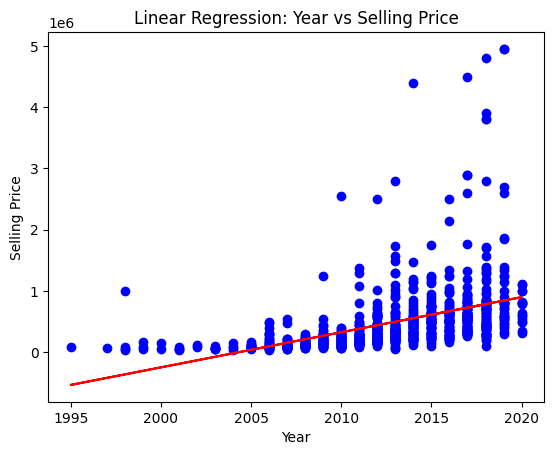

In [34]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()



In [35]:
d['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [36]:
d['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [37]:
d['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [38]:
d['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d['fuel'] = label_encoder.fit_transform(d['fuel'])
d.dtypes



name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type      object
transmission     object
owner            object
dtype: object

In [40]:
d['seller_type'] = label_encoder.fit_transform(d['seller_type'])
d.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission     object
owner            object
dtype: object

In [41]:
d['transmission'] = label_encoder.fit_transform(d['transmission'])
d['owner'] = label_encoder.fit_transform(d['owner'])
d.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission      int64
owner             int64
dtype: object

In [47]:
d.head(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
95,Fiat Avventura MULTIJET Emotion,2015,350000,53000,1,1,1,2
96,Audi A8 4.2 TDI,2013,2800000,49000,1,0,0,0
97,Datsun RediGO 1.0 S,2017,210000,15000,4,0,1,2
98,Volkswagen Jetta 1.4 TSI Comfortline,2013,450000,50000,4,1,1,0


In [48]:
car_data_encoded = pd.get_dummies(d, columns=['fuel', 'seller_type', 'transmission', 'owner'])
print(car_data_encoded.head())

                       name  year  selling_price  km_driven  fuel_0  fuel_1  \
0             Maruti 800 AC  2007          60000      70000   False   False   
1  Maruti Wagon R LXI Minor  2007         135000      50000   False   False   
2      Hyundai Verna 1.6 SX  2012         600000     100000   False    True   
3    Datsun RediGO T Option  2017         250000      46000   False   False   
4     Honda Amaze VX i-DTEC  2014         450000     141000   False    True   

   fuel_2  fuel_3  fuel_4  seller_type_0  seller_type_1  seller_type_2  \
0   False   False    True          False           True          False   
1   False   False    True          False           True          False   
2   False   False   False          False           True          False   
3   False   False    True          False           True          False   
4   False   False   False          False           True          False   

   transmission_0  transmission_1  owner_0  owner_1  owner_2  owner_3  owner_4  

In [28]:
#Multiple Regression
X_multi = d[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]  
y = d['selling_price']  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2)
multi_model = LinearRegression()

In [30]:
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)



In [31]:
mse_multi = mean_squared_error(y_test, y_pred_multi)
print(mse_multi)
mae_multi= mean_absolute_error(y_test, y_pred_multi)
print(mae_multi)
r_squared_multi = r2_score(y_test, y_pred_multi)
print(r_squared_multi)

148971570975.3592
227455.95750379405
0.45209304915761317


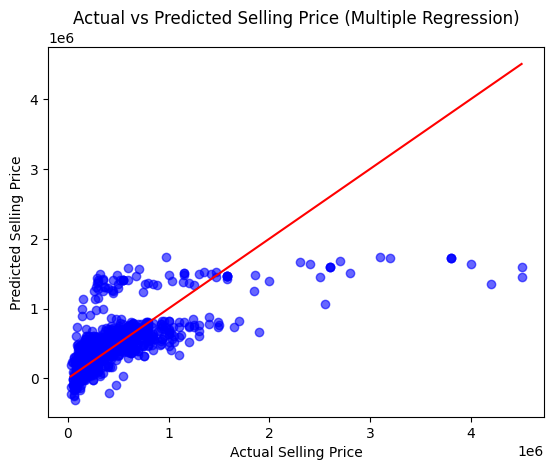

In [32]:
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Multiple Regression)')
plt.show()

